In [13]:
%matplotlib inline

#DataFrame modules
import pandas as pd

#folium map visualizer
import folium

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Cluster Kmeans
from sklearn.cluster import KMeans

#for making http request to foursquare APIs
import requests, json

#plot the data on scatter plot
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [16]:
df = pd.read_csv('prop_data.csv')

#there is total 34349 in rent house data,
#i have already droped un-relevant columns and data set of 1000 record
#out of this 1000 data we will process 150 data from prop_data_clean_filterd_data_set_removed_missing_values_1000.csv

#NOTE : YOU CAN CHANGE DATA USEAGE SIZE BY MODIFYING BELOW LINE
df = df[0:150]
df = df.sort_values(by='area',ascending=True)
df.head()

,area,bathroom_num,bedroom_num,city,desc,dev_name,floor_count,floor_num,furnishing,id,...,longitude,post_date,poster_name,price,project,title,trans,type,url,user_type
74,130.0,1.0,1,Mumbai,"1 Bath,Unfurnished,6 floor It's 1 RK property",NaN,6.0,6.0,Unfurnished,36954867,...,0.0,05-12-2019,Ibrahim Memon,10000,NaN,1 BHK Apartment for Rent in Dongri,Rent,Apartment,/propertyDetails/1-BHK-130-Sq-ft-Multistorey-A...,Owner
43,160.0,1.0,1,Mumbai,"1 Bath,Unfurnished,3 floor 1 BHK, Builder Floo...",NaN,3.0,3.0,Unfurnished,47278439,...,0.0,11-01-2020,Ajit,9000,NaN,1 BHK Builder Floor Apartment for Rent in Worli,Rent,Builder Floor Apartment,/propertyDetails/1-BHK-160-Sq-ft-Builder-Floor...,Owner
81,170.0,1.0,1,Mumbai,"1 Bath,Unfurnished It's 1 RK property",NaN,NaN,NaN,Unfurnished,45623577,...,0.0,21-12-2019,Navneet Singh,8000,NaN,1 BHK Builder Floor Apartment for Rent in Ghat...,Rent,Builder Floor Apartment,/propertyDetails/1-BHK-170-Sq-ft-Builder-Floor...,Owner
112,210.0,1.0,1,Mumbai,"1 Bath,Furnished,5 floor The Unit has 1 bedro...",NaN,7.0,5.0,Furnished,45568173,...,0.0,19-12-2019,Pooja Biswas,8000,Sarvotham Apartment Ambedkar Colony,1 BHK Apartment for Rent in Sarvotham Apartmen...,Rent,Apartment,/propertyDetails/1-BHK-210-Sq-ft-Multistorey-A...,Owner
71,220.0,1.0,1,Mumbai,"1 Bath,Semi-Furnished,2 floor,West facing West...",NaN,4.0,2.0,Semi-Furnished,46403099,...,0.0,14-12-2019,virmule,9000,NaN,1 BHK Apartment for Rent in Sakinaka,Rent,Apartment,/propertyDetails/1-BHK-220-Sq-ft-Multistorey-A...,Owner


In [20]:
df.isnull().sum()

area              7
bathroom_num      1
bedroom_num       0
city              0
desc              1
dev_name        109
floor_count      16
floor_num        15
furnishing        0
id                0
id_string         0
latitude          0
locality          9
longitude         0
post_date         0
poster_name       0
price             0
project         105
title             1
trans             0
type              0
url               1
user_type         0
dtype: int64

In [21]:
df2 = df1.dropna()
df2.isnull().sum()

area            0
bathroom_num    0
bedroom_num     0
city            0
desc            0
dev_name        0
floor_count     0
floor_num       0
furnishing      0
id              0
id_string       0
latitude        0
locality        0
longitude       0
post_date       0
poster_name     0
price           0
project         0
title           0
trans           0
type            0
url             0
user_type       0
dtype: int64

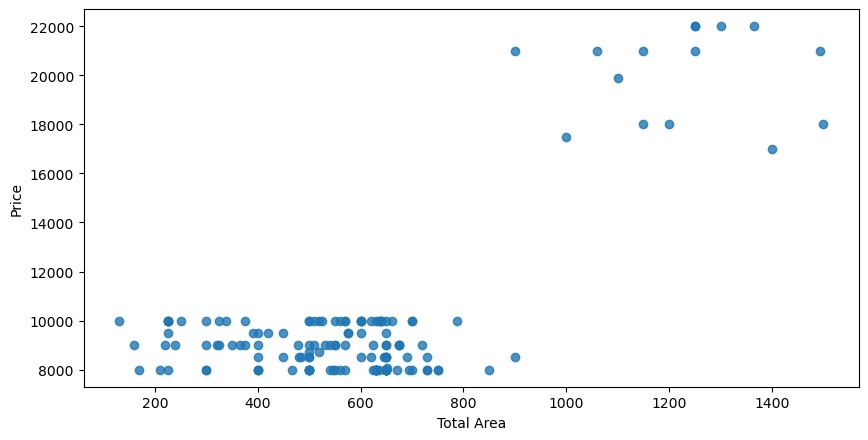

In [26]:
#lets plot the scatter plot to see the relation between Total area of house and price of house

figure(num=None, figsize=(10,5),dpi=100)

x = df.area
y = df.price


plt.scatter(x, y, alpha=0.8,cmap='viridis')
plt.xlabel('Total Area')
plt.ylabel('Price')
plt.show()
#dark green #097502
#light green #5CDD53
#light red #097502
#Dark light Red  #C08D8D
#Dark Red #C05252

#### Above scatter plot show the that as the total house area increase the prices also increased

In [41]:
m = folium.Map(location=[19.136816,72.854794], zoom_start=13,width=1000,height=500)

for i in range(0,len(df.latitude)):
    #titleWithPrice = "<b>Area Name</b> : " + df.iloc[i]['locality']+", "  + "</br><b>House description</b> : "+df.iloc[i]['title']+", " +"</br> <b>Rent</b> : "+str(df.iloc[i]['price'])+"/- month"
    
    titleWithPrice = "<b>Area Name</b> : " +str(df.iloc[i]['locality'])+", "  + "</br><b>House description</b> : "+str(df.iloc[i]['title'])+", " +"</br> <b>Rent</b> : "+str(df.iloc[i]['price'])+"/- month"

    
    colorCodeMarker = "blue"
    if(df.iloc[i]['price'] in range(5000,10000)):
        colorCodeMarker = 'darkgreen'
        
    elif(df.iloc[i]['price'] in range(10000,20000)):
        colorCodeMarker = 'green'
    elif(df.iloc[i]['price'] in range(20000,30000)):
        colorCodeMarker = 'lightgreen'
    elif(df.iloc[i]['price'] in range(30000,40000)):
        colorCodeMarker = 'lightred'
    elif(df.iloc[i]['price'] in range(40000,50000)):
        colorCodeMarker = 'red'
            
    folium.Marker([df.iloc[i]['latitude'], df.iloc[i]['longitude']], popup=titleWithPrice, icon=folium.Icon(color=colorCodeMarker,icon_color='white')).add_to(m)
m

#### In order to save above clustered map to .html file you can execute below line

In [42]:
m.save('312_markers_on_folium_map1.html')

In [62]:
#now lets explore the Restaurant venue using foursquare API

url = "https://api.foursquare.com/v2/venues/explore"

params = dict(
    client_id='DYRAVTHZVMQCR2V0DVVBBVJNTRSXIGOC1B0W4AQLQ5HT5QMT',# Place your client_id of foursquare API
    client_secret='UDGSAX0TT3VRAUDFUI4GGJSVFGW0ZZ4N0FTMIAPRJT1MB0RM',# Place your client_secret of foursquare API
    v='20180323',
    ll='19.14780617, 72.84235382',
    query='Restaurant',
    limit=1,
    radius=1000,
)

res = requests.get(url=url,params=params)

res.text

'{"meta":{"code":200,"requestId":"60045bd7e1508a23af9a477a"},"response":{"suggestedFilters":{"header":"Tap to show:","filters":[{"name":"Open now","key":"openNow"}]},"warning":{"text":"There aren\'t a lot of results for \\"Restaurant.\\" Try something more general, reset your filters, or expand the search area."},"headerLocation":"Jogeshwari West","headerFullLocation":"Jogeshwari West, Mumbai","headerLocationGranularity":"neighborhood","query":"restaurant","totalResults":15,"suggestedBounds":{"ne":{"lat":19.156806179000007,"lng":72.85186312173924},"sw":{"lat":19.13880616099999,"lng":72.83284451826076}},"groups":[{"type":"Recommended Places","name":"recommended","items":[{"reasons":{"count":0,"items":[{"summary":"This spot is popular","type":"general","reasonName":"globalInteractionReason"}]},"venue":{"id":"4beaed8a415e20a130a6e5bb","name":"Fareed Seekh Kebab","contact":{},"location":{"address":"Behram Baug Road","crossStreet":"Jogeshwari (West)","lat":19.14333600769705,"lng":72.8379429

In [69]:
def getNearVenus(names, latitudes, longitudes, radius=1000):
    
    lists_of_data=[]
    for name,lat,lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = "https://api.foursquare.com/v2/venues/explore"

        params = dict(
            client_id='DYRAVTHZVMQCR2V0DVVBBVJNTRSXIGOC1B0W4AQLQ5HT5QMT',# Place your client_id of foursquare API
            client_secret='UDGSAX0TT3VRAUDFUI4GGJSVFGW0ZZ4N0FTMIAPRJT1MB0RM',# Place your client_secret of foursquare API
            v='20180323',
            ll='{},{}'.format(lat, lng),
            query='Restaurant',
            limit=1,
            radius=radius,
        )
            
        results = requests.get(url=url,params=params).json()["response"]['groups'][0]['items']
        
        lists_of_data.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in lists_of_data for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [70]:
ndf = getNearVenus(names=df1.locality,
                   latitudes=df1['latitude'],
                   longitudes=df1['longitude']
                  )

Naigaon East
Vasai West
Virar
Virar
Naigaon East
Virar West
Virar West
Virar West
Virar West
Virar West
Virar
Virar
Virar
Kalyan
Vasai East
Virar
Vasai East
Goregaon East
Kalyan
Virar West
Virar
Virar
Virar
Mira Road
Vasai West
Bolinj
Virar
Vasai East
Virar West
Virar
Vinay Nagar
Poonam Gardens
Mira Road
Tirupati Nagar
Mira Road
Unique Garden
Mira Road
Ramdev Park


In [71]:
ndf.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Naigaon East,19.360215,72.850167,Vaman Dhaba,19.356340,72.856704,Indian Restaurant
1,Vasai West,19.370682,72.812934,Western Inn,19.363244,72.813850,Restaurant
2,Virar,19.461619,72.800999,Domino's Pizza,19.457100,72.804253,Pizza Place
3,Virar,19.467032,72.801612,McDonald's,19.474018,72.804842,Fast Food Restaurant
4,Naigaon East,19.360215,72.850167,Vaman Dhaba,19.356340,72.856704,Indian Restaurant


In [72]:
ndf.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bolinj,1,1,1,1,1,1
Goregaon East,1,1,1,1,1,1
Mira Road,4,4,4,4,4,4
Naigaon East,2,2,2,2,2,2
Poonam Gardens,1,1,1,1,1,1
Ramdev Park,1,1,1,1,1,1
Tirupati Nagar,1,1,1,1,1,1
Unique Garden,1,1,1,1,1,1
Vasai East,3,3,3,3,3,3


In [73]:
#lets analyze the data 
noht = pd.get_dummies(ndf[['Venue Category']],prefix="",prefix_sep="")

noht['Neighborhood'] = ndf['Neighborhood']

fixColumns = [noht.columns[-1]] + list(noht.columns[0:-1])

noht = noht[fixColumns]

noht.head()

,Neighborhood,Donut Shop,Fast Food Restaurant,Indian Restaurant,Mexican Restaurant,Pizza Place,Restaurant
0,Naigaon East,0,0,1,0,0,0
1,Vasai West,0,0,0,0,0,1
2,Virar,0,0,0,0,1,0
3,Virar,0,1,0,0,0,0
4,Naigaon East,0,0,1,0,0,0


In [74]:

venue_grouped = noht.groupby('Neighborhood').mean().reset_index()
venue_grouped.shape
venue_grouped

,Neighborhood,Donut Shop,Fast Food Restaurant,Indian Restaurant,Mexican Restaurant,Pizza Place,Restaurant
0,Bolinj,0.0,0.000000,0.000000,0.0,1.000000,0.0
1,Goregaon East,1.0,0.000000,0.000000,0.0,0.000000,0.0
2,Mira Road,0.0,0.000000,0.250000,0.0,0.750000,0.0
3,Naigaon East,0.0,0.000000,1.000000,0.0,0.000000,0.0
4,Poonam Gardens,0.0,0.000000,0.000000,1.0,0.000000,0.0
5,Ramdev Park,0.0,0.000000,1.000000,0.0,0.000000,0.0
6,Tirupati Nagar,0.0,0.000000,0.000000,0.0,1.000000,0.0
7,Unique Garden,0.0,0.000000,0.000000,0.0,1.000000,0.0
8,Vasai East,0.0,0.000000,0.666667,0.0,0.333333,0.0
9,Vasai West,0.0,0.000000,0.000000,0.0,0.000000,1.0


In [75]:
#get top 5 venues near Neighborhood and find the frequency

nOfVenue = 5

for item in venue_grouped['Neighborhood']:
    print("-------"+item)
    t = venue_grouped[venue_grouped['Neighborhood']==item].T.reset_index()
    t.columns = ['venue','freq']
    t = t.iloc[1:]
    t['freq'] = t['freq'].astype(float)
    t = t.round({'freq':2})
    print(t.sort_values('freq',ascending=False).reset_index(drop=True).head(nOfVenue))

-------Bolinj
                  venue  freq
0           Pizza Place   1.0
1            Donut Shop   0.0
2  Fast Food Restaurant   0.0
3     Indian Restaurant   0.0
4    Mexican Restaurant   0.0
-------Goregaon East
                  venue  freq
0            Donut Shop   1.0
1  Fast Food Restaurant   0.0
2     Indian Restaurant   0.0
3    Mexican Restaurant   0.0
4           Pizza Place   0.0
-------Mira Road
                  venue  freq
0           Pizza Place  0.75
1     Indian Restaurant  0.25
2            Donut Shop  0.00
3  Fast Food Restaurant  0.00
4    Mexican Restaurant  0.00
-------Naigaon East
                  venue  freq
0     Indian Restaurant   1.0
1            Donut Shop   0.0
2  Fast Food Restaurant   0.0
3    Mexican Restaurant   0.0
4           Pizza Place   0.0
-------Poonam Gardens
                  venue  freq
0    Mexican Restaurant   1.0
1            Donut Shop   0.0
2  Fast Food Restaurant   0.0
3     Indian Restaurant   0.0
4           Pizza Place   0.0
------

In [141]:
def getCommonVenues(row,no_of_top_venue):
    row_c = row.iloc[1:]
    row_c_sorted = row_c.sort_values(ascending=False)
    return row_c_sorted.index.values[0:no_of_top_venue]

In [142]:
#find top 5 venues for each house Neighborhood
no_of_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(no_of_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = venue_grouped['Neighborhood']

for ind in np.arange(venue_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = getCommonVenues(venue_grouped.iloc[ind, :], no_of_venues)

venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bolinj,Pizza Place,Restaurant,Mexican Restaurant,Indian Restaurant,Fast Food Restaurant
1,Goregaon East,Donut Shop,Restaurant,Pizza Place,Mexican Restaurant,Indian Restaurant
2,Mira Road,Pizza Place,Indian Restaurant,Restaurant,Mexican Restaurant,Fast Food Restaurant
3,Naigaon East,Indian Restaurant,Restaurant,Pizza Place,Mexican Restaurant,Fast Food Restaurant
4,Poonam Gardens,Mexican Restaurant,Restaurant,Pizza Place,Indian Restaurant,Fast Food Restaurant


In [143]:
# create K-cluester of house Neighborhood venues

kCluster = 5
venue_groued_cluster = venue_grouped.drop('Neighborhood',1)

kmenas = KMeans(n_clusters=kCluster,random_state=0).fit(venue_groued_cluster)
kmenas.labels_[0:10]

array([1, 0, 1, 2, 4, 2, 1, 1, 2, 3], dtype=int32)

In [144]:

venues_sorted.insert(0,'Clusters',kmenas.labels_)
venue_merged = df1
venue_merged = venue_merged.join(venues_sorted.set_index('Neighborhood'),on='locality')

In [149]:
venue_merged.isnull().sum()

area                     0
bathroom_num             0
bedroom_num              0
city                     0
desc                     0
dev_name                 0
floor_count              0
floor_num                0
furnishing               0
id                       0
id_string                0
latitude                 0
locality                 0
longitude                0
post_date                0
poster_name              0
price                    0
project                  0
title                    0
trans                    0
type                     0
url                      0
user_type                0
Clusters                 2
1st Most Common Venue    2
2nd Most Common Venue    2
3rd Most Common Venue    2
4th Most Common Venue    2
5th Most Common Venue    2
dtype: int64

In [150]:
venue_merged = venue_merged.dropna()
venue_merged.isnull().sum()

area                     0
bathroom_num             0
bedroom_num              0
city                     0
desc                     0
dev_name                 0
floor_count              0
floor_num                0
furnishing               0
id                       0
id_string                0
latitude                 0
locality                 0
longitude                0
post_date                0
poster_name              0
price                    0
project                  0
title                    0
trans                    0
type                     0
url                      0
user_type                0
Clusters                 0
1st Most Common Venue    0
2nd Most Common Venue    0
3rd Most Common Venue    0
4th Most Common Venue    0
5th Most Common Venue    0
dtype: int64

In [151]:
venue_merged['Clusters'] =venue_merged['Clusters'].astype(int)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
# create map
mapClusters = folium.Map(location=[19.136816,72.854794], zoom_start=11,width=1000,height=500)

# set color scheme for the clusters
x = np.arange(kCluster)
ys = [i + x + (i*x)**2 for i in range(kCluster)]
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(venue_merged['latitude'], venue_merged['longitude'], venue_margred['locality'], venue_merged['Clusters']):
    label = folium.Popup("Area Name : "+str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(mapClusters)
       
mapClusters